#### Once you got access to Compute Canada Clusters

# Step 1: Adding SSH Keys 

### Generate SSH Keys

##### Windows

* Open PowerShell or Command Prompt
* Type: `ssh-keygen`
* Press Enter to accept the default file location and name
  - **Note:** This will generate a file in `C:\Users\YourUsername\.ssh\id_rsa.pub`

##### Linux

* Open a terminal
* Type: `ssh-keygen`
* Press Enter to accept the default file location and name
  - **Note:** This will generate a pair of SSH keys in the `~/.ssh` directory: `id_rsa.pub` (public key).

###### Please open the file `id_rsa.pub` from the `.ssh` folder and copy its content.

###### Please open this link: [https://ccdb.computecanada.ca/ssh_authorized_keys](https://ccdb.computecanada.ca/ssh_authorized_keys)

* Once the link is opened, upload your SSH public key into the CCDB form.

* #### Tutorial: [SSH Keys Documentation](https://docs.alliancecan.ca/wiki/SSH_Keys)


# Step 2: Setting Up VStudio
# Install VSCode

The first thing you need to do is install VSCode on your local device (personal computer). We won’t go into the details of installing it here as it varies depending on your device (Linux, Windows, macOS). The install is usually straightforward.
The VSCode download for various platforms can be found here: [VSCode Download](https://code.visualstudio.com/download)

# Install Remote-SSH Extension

VSCode cannot make remote connections initially. The Remote-SSH extension is required.

1. Open VSCode and click on the Extensions panel button (see Red Box in the image below).
2. 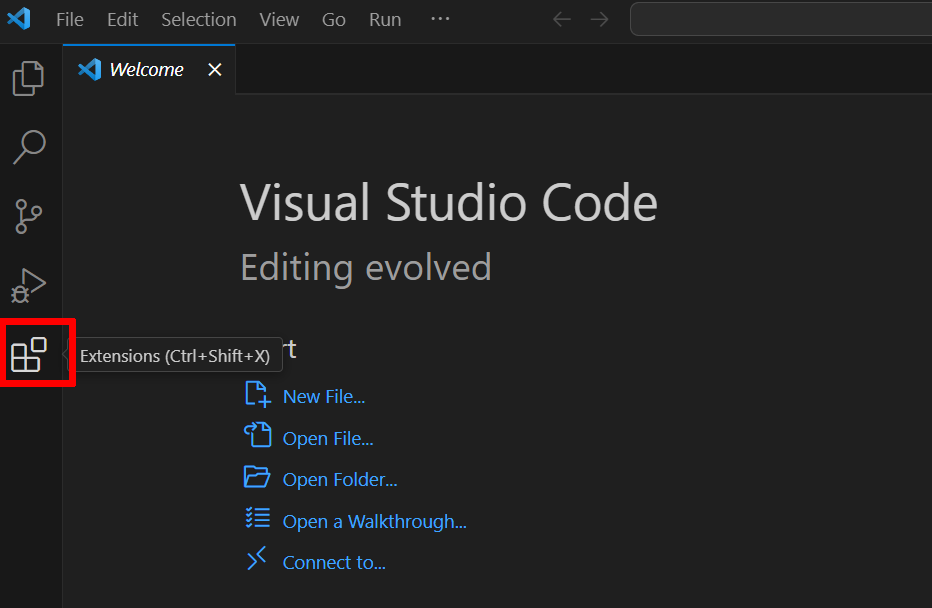
3. Click on the extension search bar (see Red Box in the image below) and start typing `remote ssh`.
4. 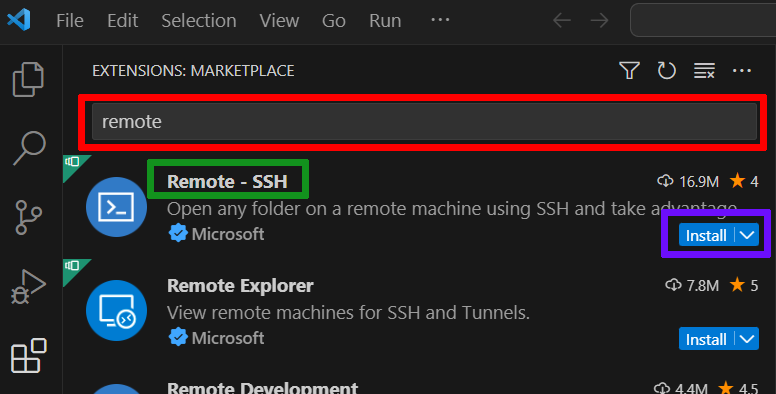
5. The Remote – SSH extension should appear (see Green Box in the image below).
6. Click on the Install button (see Purple Box in the image below).

# Create Remote-SSH Connection

1. A new panel button called Remote Explorer should appear – you may have to close and reopen VSCode (see Red Box in the image below). Click on the Remote Explorer button.
2. Expand the tree down until you see the SSH branch (see Green Box in the image below).
3. Click on the plus (+) button to begin adding a new SSH connection (see Purple Box in the image below).
4. 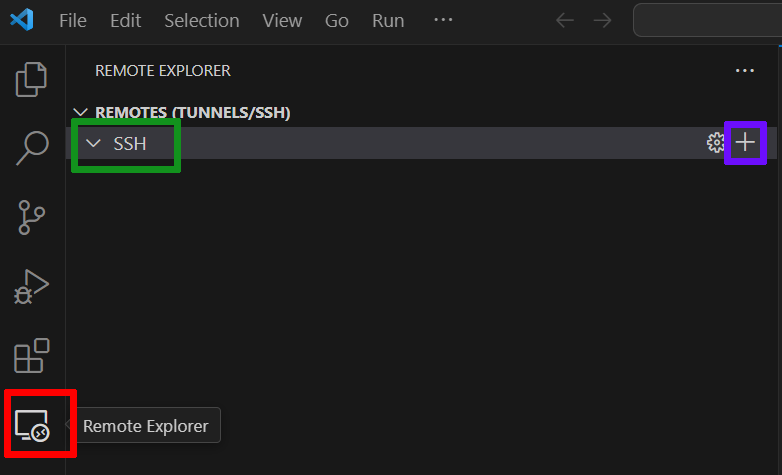

5. In the SSH Connection box that opens (see Red Box in the image below), enter `ssh your_id@nameofthecluster.computecanada.ca`
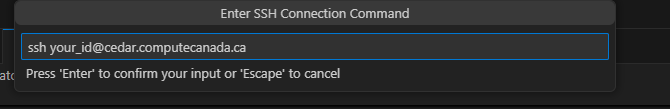
6. It will ask you to save the connection information to an ssh config file. The default one will vary depending on what operating system you are running. In general, you can select the first option (see Red Box in the image below).

7. A pop-up will appear saying the host was added. If you want, you can manually modify the ssh config file by clicking Open Config. However, this is not required, and in this case, we will just click Connect (see Red Box in the image below).
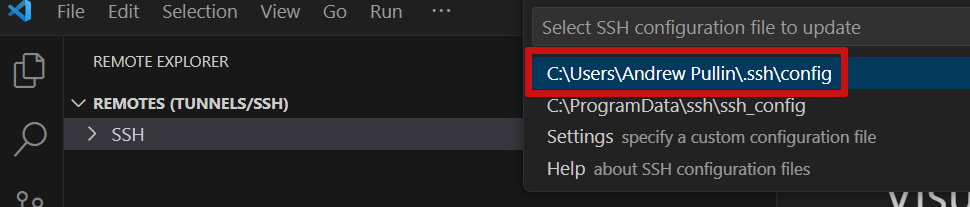
8. You will then be prompted for the password for the account (see Red Box in the image below).
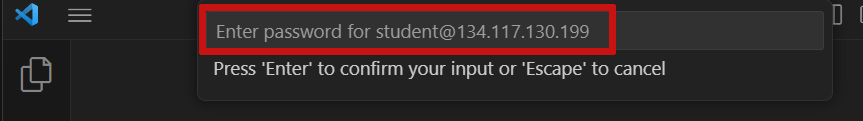
9. It will then show a pop-up on the bottom right showing the VSCode-server being added to the remote account. This may take a few moments to complete.

And that should complete adding the connection. A new empty VSCode workspace should open that is connected to that remote server.




## Step 3: Loading Software Packages in Compute Canada Using SLURM Modules

To efficiently manage and load software packages such as Python, CUDA, and others in a SLURM environment, follow these steps:

### 1. Check Available Packages
Use the `module spider` command to search for available packages and their versions. This command provides details about the package, including dependencies and compatibility.

```bash
module spider <package_name>
```

Example:

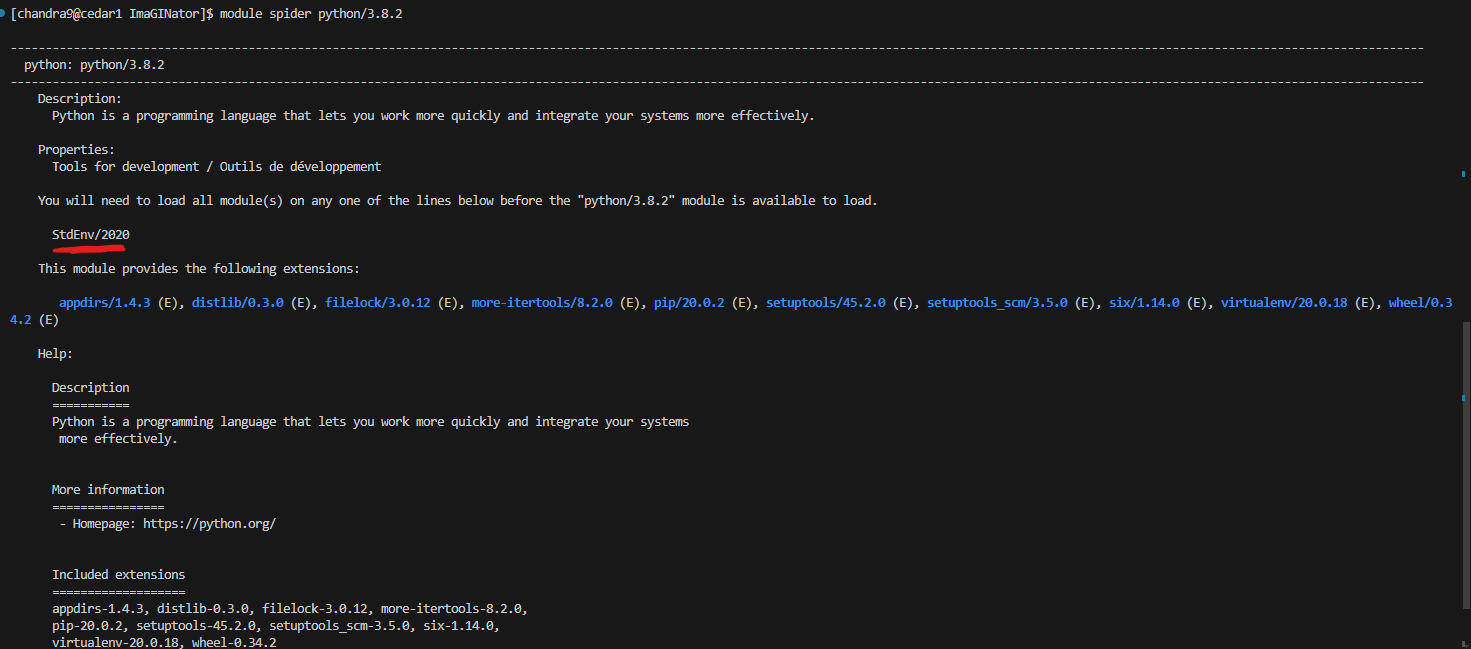

This command will list all available versions of Python and provide additional information about each version.

### 2. Load Required Dependencies
When you run the `module spider` command, it will list any required dependencies for the package you want to load. Make sure to load these dependencies before loading the actual package.

Example:

```bash
module load dependency_package_name
```

If Python requires `StdEnv/2020` load it first:

```bash
module load StdEnv/2020
```

### 3. Load the Desired Package
After loading all necessary dependencies, load the main package using the `module load` command.

```bash
module load <package_name>
```

Example:

```bash
module load python
```

### 4. Verify the Loaded Modules
To check which modules are currently loaded in your environment, use the `module list` command.

```bash
module list
```

This will display all the modules you have loaded, ensuring that the dependencies and the main package are correctly set up.

By following these steps, you can ensure that all necessary dependencies are loaded before loading the main package, preventing any conflicts or issues during your SLURM job execution.
##### Tutorial :https://docs.alliancecan.ca/wiki/Python

## Step 4: Creating and Setting Up a Python Virtual Environment

To create and set up a Python virtual environment, follow these steps:

### 1. Navigate to Your Desired Directory
Change to the directory where you want to create your virtual environment.

```bash
cd /path/to/your/desired/directory
```

Replace `/path/to/your/desired/directory` with the path to the directory where you want to set up the virtual environment.

### 2. Create the Virtual Environment
Use the `virtualenv` command to create a new virtual environment. The `--no-download` flag ensures that `virtualenv` does not download any packages while creating the environment.

```bash
virtualenv --no-download Name_of_env
```

Replace `Name_of_env` with the desired name for your virtual environment.

### 3. Activate the Virtual Environment
Activate the virtual environment using the `source` command.

```bash
source Name_of_env/bin/activate
```

### 4. Upgrade `pip`
Once the virtual environment is activated, upgrade `pip` to ensure you have the latest version. Use the `--no-index` flag to avoid accessing the PyPI index and `--upgrade` to update `pip`.

```bash
pip install --no-index --upgrade pip
```

### 5. Install Packages
After activating your virtual environment, you can install any Python packages using `pip`. For example, to install `numpy`, use:

```bash
pip install numpy --no-index
```

By following these steps, you will set up a new Python virtual environment, activate it, ensure that `pip` is up-to-date, and install any necessary packages.

# Step 5: Submitting Jobs with SLURM

To submit a job in a SLURM environment, follow these steps:

### 1. Create a Job Submission Script
Create a new file named `job_training.sh` (or any name you prefer). This file will contain the instructions for SLURM on how to run your job.

### 2. Write the Job Submission Script

Here’s a template for your `job_training.sh` script:
There is also a template file in this repo

```bash
#!/bin/bash
#SBATCH --account=def-nameof_account         # Account to charge for the job
#SBATCH --nodes=1                    # Number of nodes to allocate
#SBATCH --gpus-per-node=p100:4       # Number of GPUs per node
#SBATCH --cpus-per-task=24           # Number of CPUs per task
#SBATCH --mem=0                      # Amount of memory (0 means no limit)
#SBATCH --time=1-00:00               # Maximum runtime (days-hours:minutes)
#SBATCH --mail-user=<your-email>     # Email address for notifications
#SBATCH --mail-type=ALL              # Types of email notifications (ALL: BEGIN, END, FAIL)

# Load necessary modules
module load StdEnv/2020
module load python/3.10.2
module load gcc/11.3.0
module load cuda/11.8
module load cudacore/.11.8.0
module load cudnn/8.6.0.163

# Set up environment and run the script
SOURCEDIR=/path/to/your/environment
source $SOURCEDIR/bin/activate
python /path/to/your/script/train.py
```

### 3. Explanation of Script Components

- `#!/bin/bash`: Specifies the script should be run in a Bash shell.
- `#SBATCH --account=def-luczak`: Specifies the SLURM account to charge for the job.
- `#SBATCH --nodes=1`: Requests one node for the job.
- `#SBATCH --gpus-per-node=p100:4`: Requests 4 GPUs of type `p100` per node.
- `#SBATCH --cpus-per-task=24`: Allocates 24 CPUs for each task.
- `#SBATCH --mem=0`: No memory limit specified (depends on job requirements).
- `#SBATCH --time=1-00:00`: Sets a maximum runtime of 1 day.
- `#SBATCH --mail-user=<your-email>`: Email address for notifications about job status.
- `#SBATCH --mail-type=ALL`: Sends notifications for job beginning, end, and failure.

### 4. Submit the Job
Once your script is ready, submit it to SLURM using the `sbatch` command:

```bash
sbatch job_training.sh
```

Replace `/path/to/your/environment` and `/path/to/your/script/train.py` with the appropriate paths for your setup.

#### Note: Always check your cluster's website for details on available GPUs and other resources to ensure that your job script is compatible with the cluster’s capabilities.
###### Cedar :  https://docs.alliancecan.ca/wiki/Cedar
###### Beluga : https://docs.alliancecan.ca/wiki/B%C3%A9luga/en
###### Graham : https://docs.alliancecan.ca/wiki/Graham
###### Narval : https://docs.alliancecan.ca/wiki/Narval/en
###### Niagara : https://docs.alliancecan.ca/wiki/Niagara

By following these steps, you can create a job submission script for SLURM, which will manage your job's resources and execution environment.